In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/HW4/HW4(3)/HW4')

import mltools


# Problem1 Linear Classifier

Q1.1

In [ ]:
#Q1.1

import numpy as np
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline
import mltools as ml
#from logisticClassify2 import *
X = np.genfromtxt('/content/drive/MyDrive/HW4/X_train.txt',delimiter=None)
Y = np.genfromtxt('/content/drive/MyDrive/HW4/Y_train.txt',delimiter=None)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features
XvS,_ = ml.rescale(Xva, params) # Normalize the features


for i in range(X.shape[1]):
    print ("for the feature", i,":" "max:", np.max(X[:,i]), "min:", np.min(X[:,i]), "mean:", np.mean(X[:,i]),"variance:" , np.var(X[:,i]))

for the feature 0 :max: 253.0 min: 193.5 mean: 241.6011037 variance: 83.4991711498463
for the feature 1 :max: 249.0 min: 152.5 mean: 227.37657130000002 variance: 92.62559312501628
for the feature 2 :max: 252.5 min: 214.25 mean: 241.55415049999996 variance: 35.28633980334975
for the feature 3 :max: 252.5 min: 152.5 mean: 232.82676815000005 variance: 97.6257317486456
for the feature 4 :max: 31048.0 min: 10.0 mean: 3089.923365 variance: 15651513.756432075
for the feature 5 :max: 13630.0 min: 0.0 mean: 928.25902 variance: 3081761.8169486397
for the feature 6 :max: 9238.0 min: 0.0 mean: 138.09383 variance: 443951.7464459313
for the feature 7 :max: 125.17 min: 0.0 mean: 3.2485793303000015 variance: 8.2194850249125
for the feature 8 :max: 19.167 min: 0.87589 mean: 6.498652902749999 variance: 6.40504819135735
for the feature 9 :max: 13.23 min: 0.0 mean: 2.09713912048 variance: 4.36344047061341
for the feature 10 :max: 66.761 min: 0.0 mean: 4.21766040935 variance: 4.086371884226908
for the feat

Q1.2

In [ ]:
#Q1.2 parta, training data statistics
for i in range(XtS.shape[1]):
    print ("for the feature", i ,":", "max:", np.max(XtS[:,i]), "min:" , np.min(XtS[:,i]), "mean:", np.mean(XtS[:,i]), "variance:", np.var(XtS[:,i]))

for the feature 0 : max: 1.2446776414093952 min: -4.422165731512143 mean: 1.0618350643198937e-14 variance: 0.9999999999999918
for the feature 1 : max: 1.8142505916980844 min: -3.837995400836122 mean: 8.15703060652595e-16 variance: 0.9999999999999974
for the feature 2 : max: 1.8066817941254465 min: -4.599184593067695 mean: -3.058886477447231e-14 variance: 0.9999999999999997
for the feature 3 : max: 1.9544977425417718 min: -2.910816429908188 mean: -1.1679901490424526e-14 variance: 1.0000000000000009
for the feature 4 : max: 7.300953888425734 min: -0.7795113781142542 mean: -3.1974423109204506e-17 variance: 1.0000000000000009
for the feature 5 : max: 7.373421397063304 min: -0.5162351009819977 mean: 7.105427357601002e-18 variance: 1.0000000000000244
for the feature 6 : max: 13.767196827061854 min: -0.20010710502010892 mean: -4.263256414560601e-18 variance: 0.9999999999999484
for the feature 7 : max: 7.353078467636559 min: -1.1381986913324114 mean: 1.581668129801983e-15 variance: 1.000000000

In [ ]:
#Q1.2 partb validation data statistics
for i in range(XvS.shape[1]):
    print ("for the feature", i ,":", "max:", np.max(XvS[:,i]), "min:" , np.min(XvS[:,i]), "mean:", np.mean(XvS[:,i]), "variance:", np.var(XvS[:,i]))

for the feature 0 : max: 1.2446776414093952 min: -5.168530468433516 mean: -0.010605234762597199 variance: 1.010243790094506
for the feature 1 : max: 2.2329354800339516 min: -3.942666622920089 mean: -0.0205066101389685 variance: 1.0035701126977175
for the feature 2 : max: 1.8268418771693282 min: -4.47822409480441 mean: -0.0021482668492211277 variance: 0.9867310394368134
for the feature 3 : max: 1.9666711724978607 min: -2.910816429908188 mean: -0.019672896841860597 variance: 0.99491918642819
for the feature 4 : max: 7.300953888425734 min: -0.7795113781142542 mean: 0.022502187467474805 variance: 1.0800081408501048
for the feature 5 : max: 7.373421397063304 min: -0.5162351009819977 mean: 0.021938165246534646 variance: 1.0709309124427384
for the feature 6 : max: 13.767196827061854 min: -0.20010710502010892 mean: 0.006306302738765279 variance: 1.0126888858097438
for the feature 7 : max: 8.790053232519085 min: -1.1381986913324114 mean: -0.013491928066917354 variance: 0.9837464006045582
for th

Q1.3

[0.6506352539536249, 0.6476433022552712, 0.6447713299183154, 0.6435087668327547, 0.6307913132072887, 0.6034812128281432, 0.5461230077193896]
[0.6355942577876134, 0.6357337799874625, 0.6359411681967444, 0.6359500324197234, 0.6270736992821733, 0.6013363664605533, 0.5466684593831981]


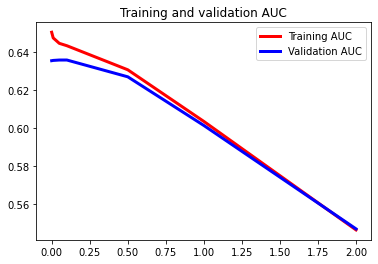

In [ ]:
#Q1.3

auct = []
aucv = []
a = [0.0, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0]
for i in a:
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=i, initStep=0.5, stopTol=1e-6, stopIter=100)
    auct.append(learner.auc(XtS, Yt))
    aucv.append(learner.auc(XvS, Yva))
    
print(auct)
print(aucv)
plt.plot(a, auct, 'r-', lw=3, label="Training AUC")
plt.plot(a, aucv, 'b-', lw=3, label="Validation AUC")
plt.title("Training and validation AUC")
plt.legend()

In [ ]:
print("Max AUC from Linear Classifier is : ", max(aucv))

Max AUC from Linear Classifier is :  0.6359500324197234


Q1.4

In [ ]:
#Q1.4

degree = 2
XtrP = mltools.transforms.fpoly(Xt,degree, bias=False) 
XtrP,params = ml.transforms.rescale(XtrP) #rescalling and getting params
XvaP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xva,degree,False), params)#usin


print(XtrP.shape)
print(Xt.shape)



(5000, 119)
(5000, 14)


The features are 119 after transformation. So 119-14 = 105, the 14 are original features, the x^2 after transformation is again 14 hence 105-19 = 105 and lastly the possible combination of features are n(n-1)/2 where n is 14 here so 14(13)/2 that explains remaining 91 features

Q1.5

/content/drive/MyDrive/HW4/HW4(3)/HW4/mltools/linearC.py:122: RuntimeWarning: overflow encountered in exp
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
/content/drive/MyDrive/HW4/HW4(3)/HW4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
/content/drive/MyDrive/HW4/HW4(3)/HW4/mltools/base.py:96: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/content/drive/MyDrive/HW4/HW4(3)/HW4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


[0.5014819872240811, 0.5014819872240811, 0.5014819872240811, 0.5310685569962046, 0.4970830129848516, 0.47740801178774805, 0.4542830210910805]
[0.496608776034008, 0.496608776034008, 0.496608776034008, 0.5272864925463104, 0.49699323658670297, 0.4794479194468537, 0.4594619015863822]
Max AUC from Linear Classifier after transformation is :  0.5272864925463104


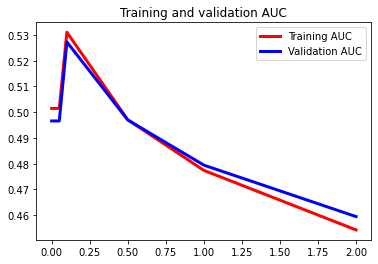

In [ ]:
#Q1.5

auct = []
aucv = []
a = [0.0, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0]
for i in a:
    learner = ml.linearC.linearClassify()
    learner.train(XtrP, Yt, reg=i, initStep=0.5, stopTol=1e-6, stopIter=100)
    learner.auc(XtrP, Yt) # train AUC
    auct.append(learner.auc(XtrP, Yt))
    aucv.append(learner.auc(XvaP, Yva))
    
print(auct)
print(aucv)
print("Max AUC from Linear Classifier after transformation is : ", max(aucv))
plt.plot(a, auct, 'r-', lw=3, label="Training AUC")
plt.plot(a, aucv, 'b-', lw=3, label="Validation AUC")
plt.title("Training and validation AUC")
plt.legend()


Hence the maximum value of AUC from linear classifier is 0.6359500324197234

# Problem 2 KNN

Q2.1

[0.9962659338061848, 0.7722311982566586, 0.7335179473163271, 0.6978440838607315, 0.683472116635004]
[0.5703389127365142, 0.6345985496121684, 0.6465092840622756, 0.6527943795891822, 0.6530353240178834]
Max AUC from KNN using alpha=0 is :  0.6530353240178834


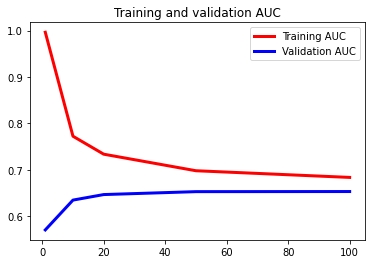

In [ ]:
auctkT = []
auckV = []
K = [1, 10, 20, 50, 100]
for k in K:
    learner = ml.knn.knnClassify()
    learner.train(XtS, Yt, K=k, alpha=0.0)
    auctkT.append(learner.auc(XtS, Yt))
    auckV.append(learner.auc(XvS, Yva))
    
print(auctkT)
print(auckV)
print("Max AUC from KNN using alpha=0 is : ", max(auckV))
plt.plot(K, auctkT, 'r-', lw=3, label="Training AUC")
plt.plot(K, auckV, 'b-', lw=3, label="Validation AUC")
plt.title("Training and validation AUC")
plt.legend()

Q2.2

[0.9967076515447836, 0.7183830619988418, 0.6770872059855533, 0.647974994077252, 0.6344284454028446]
[0.5601329014960765, 0.5895307285936914, 0.592703784104414, 0.599870689798091, 0.5982222834307611]
Max AUC from KNN using alpha=0 through original data is :  0.599870689798091


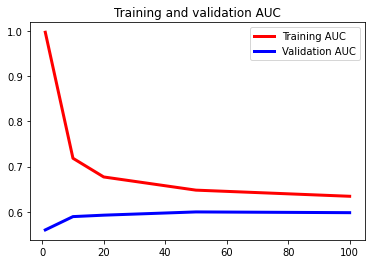

In [ ]:


auctkT = []
auckV = []
K = [1, 10, 20, 50, 100]
for k in K:
    learner = ml.knn.knnClassify()
    learner.train(Xt, Yt, K=k, alpha=0.0)
    auctkT.append(learner.auc(Xt, Yt))
    auckV.append(learner.auc(Xva, Yva))
    
print(auctkT)
print(auckV)
print("Max AUC from KNN using alpha=0 through original data is : ", max(auckV))
plt.plot(K, auctkT, 'r-', lw=3, label="Training AUC")
plt.plot(K, auckV, 'b-', lw=3, label="Validation AUC")
plt.title("Training and validation AUC")
plt.legend()

2.3a

/content/drive/MyDrive/HW4/HW4(3)/HW4/mltools/knn.py:103: RuntimeWarning: invalid value encountered in true_divide
  prob[i,:] = count / count.sum()    # save (soft) results


[[0.99626593 0.99626593 0.99626593 0.99626593 0.99626593]
 [0.8867202  0.94326563 0.97271348 0.98685796 0.99350829]
 [0.85309747 0.92521349 0.96289401 0.98208317 0.99129038]
 [0.81678712 0.90268105 0.95109209 0.97644863 0.98882031]
 [0.79915769 0.8914211  0.94503537 0.97374774 0.9876641 ]]
[[0.57035949 0.57040707 0.57040707 0.57039896 0.57039896]
 [0.63773519 0.63247996 0.62721318 0.6226284  0.61870455]
 [0.64811352 0.64055935 0.63299525 0.62643534 0.62098139]
 [0.65654212 0.64761929 0.63809417 0.62975032 0.62297934]
 [0.6578519  0.64913295 0.63926482 0.63046615 0.62334391]]


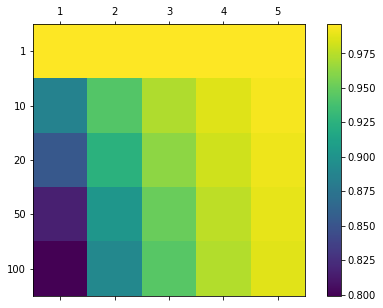

In [ ]:
K = [1, 10, 20, 50, 100]
A = [1,2,3,4,5] #A = range(1,6)
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
# train learner using k and a
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)
        va_auc[i][j] = learner.auc(XvS, Yva)
# Now plot it
print(tr_auc)
print(va_auc)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation = 'nearest')
#cax = ax.matshow(va_auc, interpolation = 'nearest')
f.colorbar(cax)
ax.set_xticklabels(['regularization']+A)
ax.set_yticklabels(['KNN Values']+K)
plt.show()



2.3b

/content/drive/MyDrive/HW4/HW4(3)/HW4/mltools/knn.py:103: RuntimeWarning: invalid value encountered in true_divide
  prob[i,:] = count / count.sum()    # save (soft) results


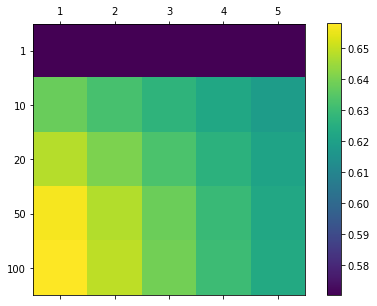

In [ ]:
K = [1, 10, 20, 50, 100]
A = [1,2,3,4,5] #A = range(1,6)
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
# train learner using k and a
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)
        va_auc[i][j] = learner.auc(XvS, Yva)
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
#cax = ax.matshow(tr_auc, interpolation = 'nearest')
cax = ax.matshow(va_auc, interpolation = 'nearest')
f.colorbar(cax)
ax.set_xticklabels(['Regularization']+A)
ax.set_yticklabels(['KNN values']+K)
plt.show()



Since we are more interested in validation AUC, this graph belongs to validation AUC hence K=100 with a = 1 is best choice for this problem which gave us maximum AUC

In [ ]:
AUCV = [0.6578519,  0.64913295, 0.63926482, 0.63046615, 0.62334391]
print("Max AUC from KNN by varying K and alphas is : ", max(AUCV))

Max AUC from KNN by varying K and alphas is :  0.6578519


The maximum value of AUC from KNN is 0.6578519

# Problem 3 Decision Trees

Q3.1

[0.6346139740267099, 0.6979384174094536, 0.8348926166781355, 0.9370907318364429, 0.9999769546368616, 0.9999769546368616, 0.9999769546368616]
[0.6180079115199609, 0.6382290168910225, 0.6093517591502644, 0.6077723589167647, 0.5815610106549411, 0.5728618894109142, 0.5747787832121307]
Max AUC from decision trees by varying maximum depth is :  0.6382290168910225


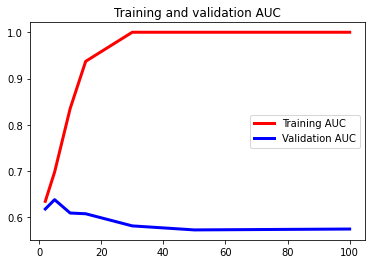

In [ ]:
#Q3.1

maxdepth=[2,5,10,15,30,50,100]
AUC=[]
AUCV=[]

for i in maxdepth:
    learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=i, minParent=2, minLeaf=1)
    learner.auc(Xt, Yt) # train AUC
    AUC.append(learner.auc(Xt, Yt))
    AUCV.append(learner.auc(Xva,Yva))

print(AUC)
print(AUCV)
print("Max AUC from decision trees by varying maximum depth is : ", max(AUCV))
    
plt.plot(maxdepth, AUC, 'r-', lw=3, label="Training AUC")
plt.plot(maxdepth, AUCV, 'b-', lw=3, label="Validation AUC")
plt.title("Training and validation AUC")
plt.legend()

Q3.2

[7, 61, 949, 3467, 9257, 9889, 9889]
[7, 61, 793, 2435, 5821, 6211, 6205]


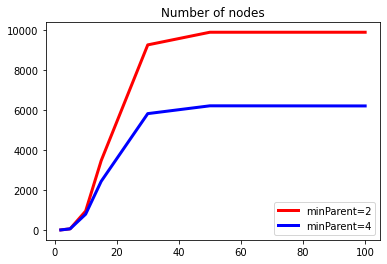

In [ ]:
learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=15)
maxdepth=[2,5,10,15,30,50,100]
nodes=[]
nodesd=[]


for i in maxdepth:
    learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=i, minParent=2, minLeaf=1)
    nodes.append(learner.sz)
for i in maxdepth:
    learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=i, minParent=4, minLeaf=1)
    nodesd.append(learner.sz)

    


print(nodes)
print(nodesd)

plt.plot(maxdepth,nodes, 'r-', lw=3, label='minParent=2')
plt.plot(maxdepth, nodesd, 'b-', lw=3, label='minParent=4')
plt.title("Number of nodes")
plt.legend()


Q3.3

[0.1162, 0.1342, 0.1614, 0.1894, 0.2314, 0.2718, 0.2834, 0.3014, 0.306]
[0.356, 0.354675, 0.355825, 0.350925, 0.342975, 0.3296, 0.3308, 0.3253, 0.320875]
[0.944562720063042, 0.9355175495372187, 0.9161083322169336, 0.8806650120633958, 0.8302013160426753, 0.7698368119277779, 0.7377212601455642, 0.7005725831197825, 0.6791478380669586]
[0.6023689423795252, 0.6010931222460414, 0.6043769093734458, 0.6095410560833024, 0.6201993157378061, 0.6346308931411334, 0.6375620427228977, 0.6437674230405426, 0.6429221456970355]
Max AUC from decision trees by varying minparent is :  0.6437674230405426


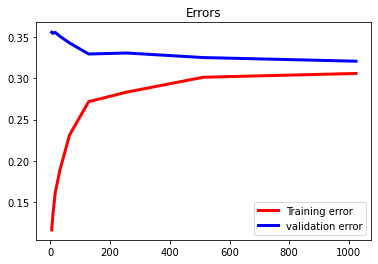

In [ ]:
minParent=[4,8,16,32,64,128,256,512,1024]

ErrorT=[]
ErrorV=[]
AUCT = []
AUCV = []


for i in minParent:
    learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=15, minParent=i, minLeaf=1)
    ErrorT.append(learner.err(Xt, Yt))
    ErrorV.append(learner.err(Xva,Yva))
    AUCT .append(learner.auc(Xt, Yt))
    AUCV.append(learner.auc(Xva,Yva))

print(ErrorT)
print(ErrorV)
print(AUCT)
print(AUCV)
print("Max AUC from decision trees by varying minparent is : ", max(AUCV))


plt.plot(minParent,ErrorT, 'r-', lw=3, label='Training error')
plt.plot(minParent,ErrorV, 'b-', lw=3, label='validation error')
plt.title("Errors")
plt.legend()

1) By increasing the number of minparent the training error is increasing and validation error decreasing, hence by increasing the min parent number model is becoming less complex. 2) The minparent 1024 is giving minimum error for validation hence it will be best minparent parameter for this model.

Max AUC from decision trees is :  0.6437674230405426

#Problem 4 Neural Networks

Q4.1

[14, 5, 2]
it 1 : Jsur = 0.4278499983376294, J01 = 0.3378
it 2 : Jsur = 0.4180812655439466, J01 = 0.321
it 4 : Jsur = 0.4131189400029065, J01 = 0.3162
it 8 : Jsur = 0.40887572567455577, J01 = 0.3108
it 16 : Jsur = 0.4057019327981397, J01 = 0.303
it 32 : Jsur = 0.4031020344817119, J01 = 0.3008
it 64 : Jsur = 0.4005355204803989, J01 = 0.3002
it 128 : Jsur = 0.39759972146472966, J01 = 0.2936
it 256 : Jsur = 0.39521789408895985, J01 = 0.2886
[14, 10, 2]
it 1 : Jsur = 0.4280317062884044, J01 = 0.3302
it 2 : Jsur = 0.4180731714656176, J01 = 0.3206
it 4 : Jsur = 0.4121131341829936, J01 = 0.3138
it 8 : Jsur = 0.408014422659245, J01 = 0.309
it 16 : Jsur = 0.405205391340784, J01 = 0.2996
it 32 : Jsur = 0.4032378742279209, J01 = 0.3002
it 64 : Jsur = 0.40106540872262103, J01 = 0.2996
it 128 : Jsur = 0.39806852235328194, J01 = 0.3002
it 256 : Jsur = 0.394924661061203, J01 = 0.2994
[14, 25, 2]
it 1 : Jsur = 0.4252797496815909, J01 = 0.3228
it 2 : Jsur = 0.4177269905946876, J01 = 0.3182
it 4 : Jsur 

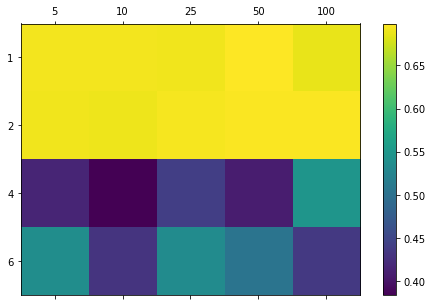

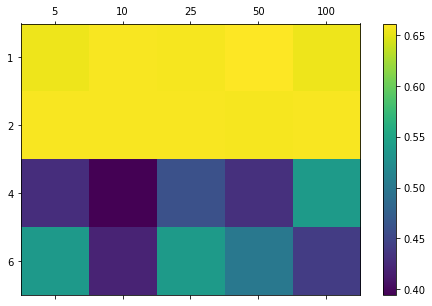

In [ ]:
layers = [1, 2, 4, 6]
nodes = [5, 10, 25, 50, 100]
input = [14]
output = [2]

tr_auc = np.zeros((len(layers),len(nodes)))
va_auc = np.zeros((len(layers),len(nodes)))


for n,k in enumerate(layers):
    for i, j in enumerate(nodes):
        
        size = input+k*[j]+output
        print(size)

        nn = ml.nnet.nnetClassify()
        nn.init_weights(size, 'random', XtS, Yt) # as many layers nodes you want

        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[n][i] = nn.auc(XtS, Yt)
        va_auc[n][i] = nn.auc(XvS, Yva)

print(tr_auc)
print(va_auc)

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()


 

      
      






In [ ]:
AUCV1= [0.65448847, 0.65902734, 0.65749559, 0.66144945, 0.65470328]
AUC2= [0.6587068,  0.65838243, 0.65861099, 0.65780025, 0.65920777]
 
print("Max AUC from NN from layer=1 is : ", max(AUCV1))
print("Max AUC from NN from layer=2 is : ", max(AUC2))
 

Max AUC from NN from layer=1 is :  0.66144945
Max AUC from NN from layer=2 is :  0.65920777


Since the maximum AUC I got is using 1 hidden layer and 50 nodes hence I will recommend that for this model

#4.2

[14, 5, 2]
it 1 : Jsur = 0.4276603298827784, J01 = 0.3332
it 2 : Jsur = 0.41904915085433775, J01 = 0.3184
it 4 : Jsur = 0.4160740819008741, J01 = 0.3114
it 8 : Jsur = 0.4157566990065492, J01 = 0.3114
it 16 : Jsur = 0.4163459579854325, J01 = 0.3104
it 32 : Jsur = 0.4171376773930543, J01 = 0.3358
it 64 : Jsur = 0.41789790185100684, J01 = 0.3358
it 128 : Jsur = 0.418575856992826, J01 = 0.3358
it 256 : Jsur = 0.41917680889695486, J01 = 0.3358
[14, 10, 2]
it 1 : Jsur = 0.42839355563133996, J01 = 0.3266
it 2 : Jsur = 0.4182051337889383, J01 = 0.312
it 4 : Jsur = 0.4137585781724355, J01 = 0.306
it 8 : Jsur = 0.4122023762565243, J01 = 0.3092
it 16 : Jsur = 0.4120856401475648, J01 = 0.3062
it 32 : Jsur = 0.4124873118973428, J01 = 0.3082
it 64 : Jsur = 0.4130755092168285, J01 = 0.308
it 128 : Jsur = 0.4137062097464017, J01 = 0.3088
it 256 : Jsur = 0.4143087132375243, J01 = 0.3098
[14, 25, 2]
it 1 : Jsur = 0.43846519237410564, J01 = 0.344
it 2 : Jsur = 0.4225643671947211, J01 = 0.3192
it 4 : Jsur

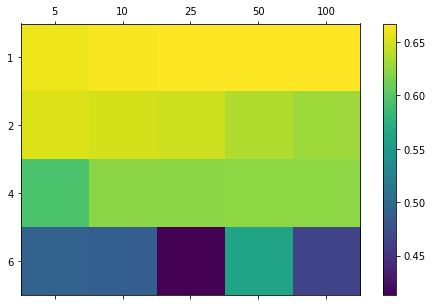

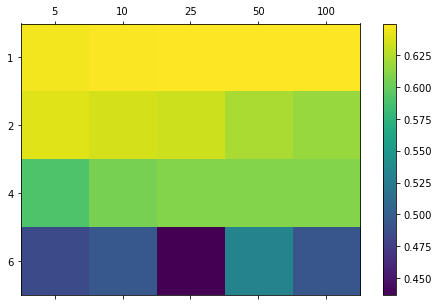

In [ ]:
layers = [1, 2, 4, 6]
nodes = [5, 10, 25, 50, 100]
input = [14]
output = [2]

tr_auc = np.zeros((len(layers),len(nodes)))
va_auc = np.zeros((len(layers),len(nodes)))


for n,k in enumerate(layers):
    for i, j in enumerate(nodes):
        
        size = input+k*[j]+output
        print(size)

        nn = ml.nnet.nnetClassify()
        nn.setActivation('logistic')
        nn.init_weights(size, 'random', XtS, Yt) # as many layers nodes you want

        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[n][i] = nn.auc(XtS, Yt)
        va_auc[n][i] = nn.auc(XvS, Yva)

print(tr_auc)
print(va_auc)

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()


 

      


In [ ]:
NNV1= [0.64588552, 0.64845269, 0.6498246,  0.64998368, 0.6495902 ]
NNV2= [0.63923313, 0.63642184, 0.63386569, 0.62281522, 0.61666482]
print("Max AUC from NN from layer=1 is : ", max(NNV1))
print("Max AUC from NN from layer=2 is : ", max(NNV2))

Max AUC from NN from layer=1 is :  0.64998368
Max AUC from NN from layer=2 is :  0.63923313


[14, 5, 2]
it 1 : Jsur = 0.42521794619053616, J01 = 0.3226
it 2 : Jsur = 0.4171680939271063, J01 = 0.3176
it 4 : Jsur = 0.41237243608893887, J01 = 0.3128
it 8 : Jsur = 0.4084031501373391, J01 = 0.309
it 16 : Jsur = 0.40543606229633544, J01 = 0.3058
it 32 : Jsur = 0.402773204792695, J01 = 0.3054
it 64 : Jsur = 0.40015753835630585, J01 = 0.3002
it 128 : Jsur = 0.3979803849557385, J01 = 0.2952
it 256 : Jsur = 0.3966162890371913, J01 = 0.2934
[14, 10, 2]
it 1 : Jsur = 0.42630043434797116, J01 = 0.3268
it 2 : Jsur = 0.4176660301535442, J01 = 0.3184
it 4 : Jsur = 0.4122431049826274, J01 = 0.3136
it 8 : Jsur = 0.4080978985278313, J01 = 0.3078
it 16 : Jsur = 0.40505889670740014, J01 = 0.3018
it 32 : Jsur = 0.40285925545053997, J01 = 0.2998
it 64 : Jsur = 0.40077457924925003, J01 = 0.2998
it 128 : Jsur = 0.3985482121815929, J01 = 0.296
it 256 : Jsur = 0.3962062947088191, J01 = 0.294
[14, 25, 2]
it 1 : Jsur = 0.42481366240888757, J01 = 0.3192
it 2 : Jsur = 0.41822380252816654, J01 = 0.3172
it 4 

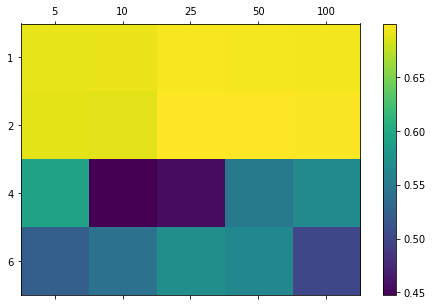

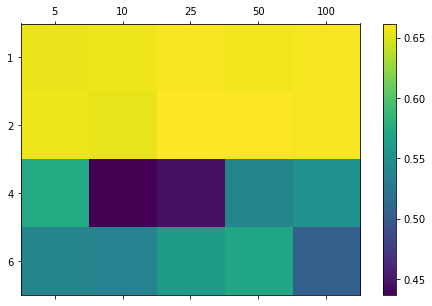

In [ ]:
layers = [1, 2, 4, 6]
nodes = [5, 10, 25, 50, 100]
input = [14]
output = [2]

tr_auc = np.zeros((len(layers),len(nodes)))
va_auc = np.zeros((len(layers),len(nodes)))


for n,k in enumerate(layers):
    for i, j in enumerate(nodes):
        
        size = input+k*[j]+output
        print(size)

        nn = ml.nnet.nnetClassify()
        nn.setActivation('htangent')
        nn.init_weights(size, 'random', XtS, Yt) # as many layers nodes you want

        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[n][i] = nn.auc(XtS, Yt)
        va_auc[n][i] = nn.auc(XvS, Yva)

print(tr_auc)
print(va_auc)

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()


 

      

In [ ]:
NNV1= [0.65494996, 0.65607836, 0.65980039, 0.65676178, 0.65824482]
NNV2 = [0.65552205, 0.65410391, 0.66118629, 0.66161364, 0.65896141]
print("Max AUC from NN from layer=1 is : ", max(NNV1))
print("Max AUC from NN from layer=2 is : ", max(NNV2))

Max AUC from NN from layer=1 is :  0.65980039
Max AUC from NN from layer=2 is :  0.66161364


The Htangent function is better for validation AUC and training AUC

#Q4.3

The maximum value of AUC from Neural Network is 0.66161364 that is the maximum value out of all the maximum values obtained so far hence that is the final model for this data. 
Parameters are
Neural Network, Activation('htangent'), Number of hidden layers = 2 and numbers of nodes per layer = 50

In [ ]:
Xtest= np.genfromtxt('/content/drive/MyDrive/HW4/X_test.txt',delimiter=None)

Score: 0.72755 and Kaggle Name is = Eesha Tur Razia Babar

Even though the maximum AUC I obtained using train and validate was using neural network but the maximum value of AUC, I obtained on Kaggle data is using decision trees, maxdepth= 30, minparent= 64, minleaf=1. Hence, this is final recommended model from my side for kaggle data

In [ ]:
Xte= np.genfromtxt('/content/drive/MyDrive/HW4/X_test.txt',delimiter=None)
learner = ml.dtree.treeClassify(X, Y, maxDepth=30, minParent=64, minLeaf=1)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

#Collaborations

I took help from TAs and used piazza to remove my confusions